In [29]:
!pip install git+https://github.com/Pedro-HFelix/IA.git
!pip install graphviz

zsh:1: command not found: pip
zsh:1: command not found: pip


In [30]:
from trees_classifiers.ID3 import DecisionTreeID3
from trees_classifiers.C45 import DecisionTreeC45
from trees_classifiers.CART import DecisionTreeCART

import pandas as pd
import graphviz
import itertools
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [32]:

def plot_tree(tree, feature_names):

    dot = graphviz.Digraph(comment='Decision Tree', format='png')
    dot.attr('node', shape='box', style='rounded') 
    
    node_id_generator = itertools.count()
    
    def add_nodes_edges(node, parent_id=None, edge_label=""):
        if not isinstance(node, dict):
            node_id = next(node_id_generator)
            dot.node(str(node_id), label=str(node), shape='ellipse')
            if parent_id is not None:
                dot.edge(str(parent_id), str(node_id), label=edge_label)
            return

        feature = next(iter(node))
        
        node_id = next(node_id_generator)
        dot.node(str(node_id), label=str(feature))
        
        if parent_id is not None:
            dot.edge(str(parent_id), str(node_id), label=edge_label)
        
        for branch, subtree in node[feature].items():
            add_nodes_edges(subtree, parent_id=node_id, edge_label=str(branch))

    add_nodes_edges(tree)
    
    return dot


def extract_rules(tree, current_path=[]):
    if not isinstance(tree, dict):
        prediction = tree
        if not current_path:
            return [f"ENTÃO {prediction}"]
        rule = "SE " + " E ".join(current_path) + " ENTÃO " + str(prediction)
        return [rule]

    all_rules = []
    feature = next(iter(tree))
    
    for branch, subtree in tree[feature].items():
        
        if isinstance(branch, tuple):
            op, value = branch
            op = op.strip()
            value_str = f"'{value}'" if isinstance(value, str) else str(value)
            condition = f"{feature} {op} {value_str}"
        
        else:
            if "<=" in str(branch) or ">" in str(branch):
                condition = f"{feature} {branch}"
            else:
                value_str = f"'{branch}'" if isinstance(branch, str) else str(branch)
                condition = f"{feature} == {value_str}"
        
        new_path = current_path + [condition]
        rules_from_branch = extract_rules(subtree, new_path)
        all_rules.extend(rules_from_branch)
        
    return all_rules

def print_formatted_rules(model):
    if model.tree is None:
        print("O modelo ainda não foi treinado. Chame o método .build() primeiro.")
        return
    
    
    rules = extract_rules(model.tree)
    
    if not rules:
        print("Nenhuma regra foi extraída.")
    else:
        for i, rule in enumerate(rules):
            print(f"Regra {i+1}: {rule}")

In [33]:
with open('Titanic.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)
# with open('Play.pkl', 'rb') as f:
#     X_train, X_test, y_train, y_test = pickle.load(f)

train_data = pd.concat([X_train, y_train], axis=1)
features = list(X_train.columns)
target = y_train.name



--- Algoritmo ID3 ---

--- Métricas de Avaliação para o Modelo ID3 ---
Acurácia: 0.7654

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       110
           1       0.74      0.61      0.67        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179


Matriz de Confusão:
[[95 15]
 [27 42]]
Regra 1: SE Sex == 1 E Fare == 3 E SibSp == 0 E Age == 2 E Pclass == 3 ENTÃO 1
Regra 2: SE Sex == 1 E Fare == 3 E SibSp == 0 E Age == 2 E Pclass == 1 E Embarked_C == 0.0 ENTÃO 0
Regra 3: SE Sex == 1 E Fare == 3 E SibSp == 0 E Age == 2 E Pclass == 1 E Embarked_C == 1.0 E Parch == 0 ENTÃO 0
Regra 4: SE Sex == 1 E Fare == 3 E SibSp == 0 E Age == 2 E Pclass == 1 E Embarked_C == 1.0 E Parch == 1 ENTÃO 0
Regra 5: SE Sex == 1 E Fare == 3 E SibSp == 0 E Age == 2 E Pclass == 1 E Embarked_C == 1.0 E Parch == 2 ENTÃO 0
Re

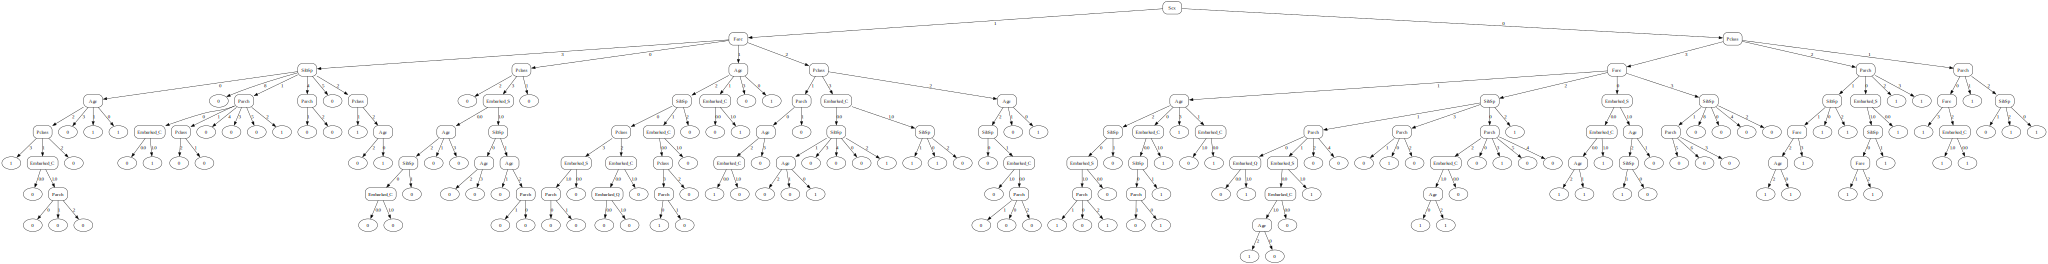

In [34]:
print("--- Algoritmo ID3 ---")
model_id3 = DecisionTreeID3(data=train_data, features=features, target_class=target)
model_id3.build()

test_samples = X_test.to_dict(orient='records')
y_pred = [model_id3.predict(sample) for sample in test_samples]

print("\n--- Métricas de Avaliação para o Modelo ID3 ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


print_formatted_rules(model_id3)

print("\n")

id3_tree_graph = plot_tree(model_id3.tree, features)
id3_tree_graph

--- Algoritmo C4.5 ---


/var/folders/xw/7_chx6gd3dxd7s10j71hxp_w0000gn/T/ipykernel_24754/54996391.py:157: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[col][:] = data[col].fillna(mean_val)
/var/folders/xw/7_chx6gd3dxd7s10j71hxp_w0000gn/T/ipykernel_24754/549963


--- Métricas de Avaliação para o Modelo C45 ---
Acurácia: 0.7821

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179


Matriz de Confusão:
[[95 15]
 [24 45]]
Regra 1: SE Sex <= 0.5 E SibSp <= 6.0 E Parch <= 5.5 E Pclass <= 2.5 E Fare == 2 E Parch <= 1.5 E Age == 2 E SibSp <= 1.5 E SibSp <= 0.5 E Embarked_C <= 0.5 ENTÃO 1
Regra 2: SE Sex <= 0.5 E SibSp <= 6.0 E Parch <= 5.5 E Pclass <= 2.5 E Fare == 2 E Parch <= 1.5 E Age == 2 E SibSp <= 1.5 E SibSp <= 0.5 E Embarked_C > 0.5 ENTÃO 1
Regra 3: SE Sex <= 0.5 E SibSp <= 6.0 E Parch <= 5.5 E Pclass <= 2.5 E Fare == 2 E Parch <= 1.5 E Age == 2 E SibSp <= 1.5 E SibSp > 0.5 E Embarked_C <= 0.5 E Parch <= 0.5 ENTÃO 1
Regra 4: SE Sex <= 0.5 E SibSp

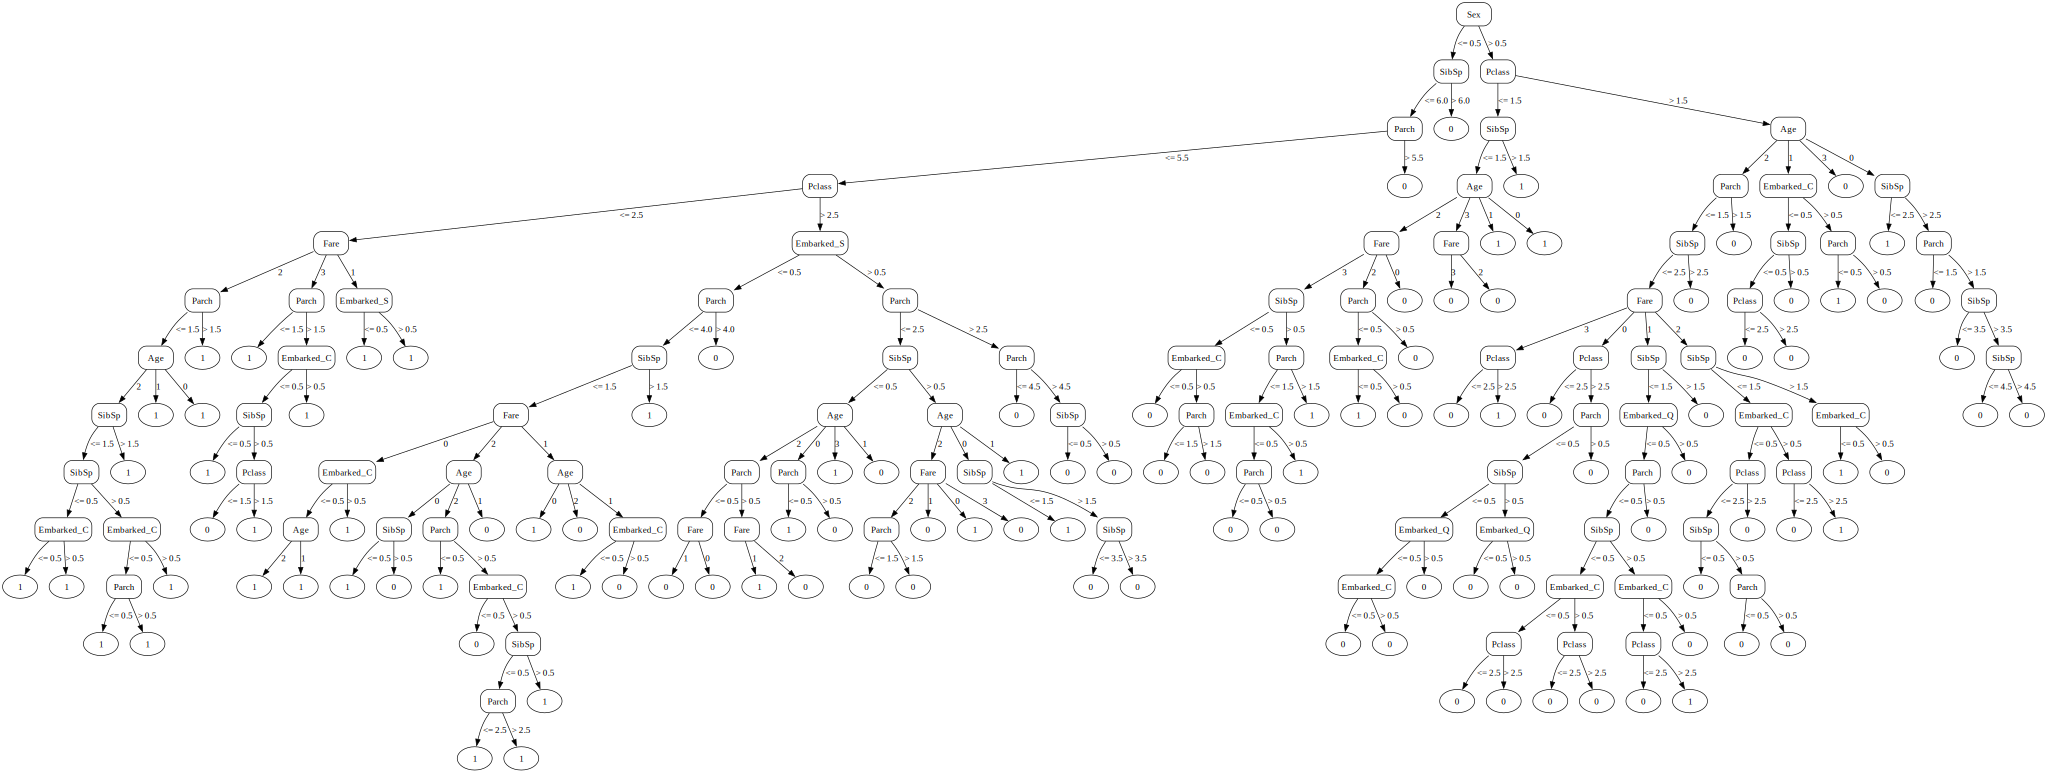

In [35]:
print("--- Algoritmo C4.5 ---")
model_c45 = DecisionTreeC45(data=train_data, features=features, target_class=target)
model_c45.build()

test_samples = X_test.to_dict(orient='records')
y_pred = [model_c45.predict(sample) for sample in test_samples]

print("\n--- Métricas de Avaliação para o Modelo C45 ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print_formatted_rules(model_c45)
print("\n")

c45_tree_graph = plot_tree(model_c45.tree, features)
c45_tree_graph

--- Algoritmo CART ---

--- Métricas de Avaliação para o Modelo Cart  --
Acurácia: 0.6145

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179


Matriz de Confusão:
[[110   0]
 [ 69   0]]
Regra 1: SE Sex <= 0.5 E Pclass <= 2.5 E Fare == 3 E Parch <= 1.5 ENTÃO 1
Regra 2: SE Sex <= 0.5 E Pclass <= 2.5 E Fare == 3 E Parch > 1.5 E Embarked_C <= 0.5 E SibSp <= 0.5 ENTÃO 1
Regra 3: SE Sex <= 0.5 E Pclass <= 2.5 E Fare == 3 E Parch > 1.5 E Embarked_C <= 0.5 E SibSp > 0.5 E Pclass <= 1.5 ENTÃO 0
Regra 4: SE Sex <= 0.5 E Pclass <= 2.5 E Fare == 3 E Parch > 1.5 E Embarked_C <= 0.5 E SibSp > 0.5 E Pclass > 1.5 ENTÃO 1
Regra 5: SE Sex <= 0.5 E Pclass <= 2.5 E Fare == 3 E Parch > 1.5 E Embarked_C > 0.5

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

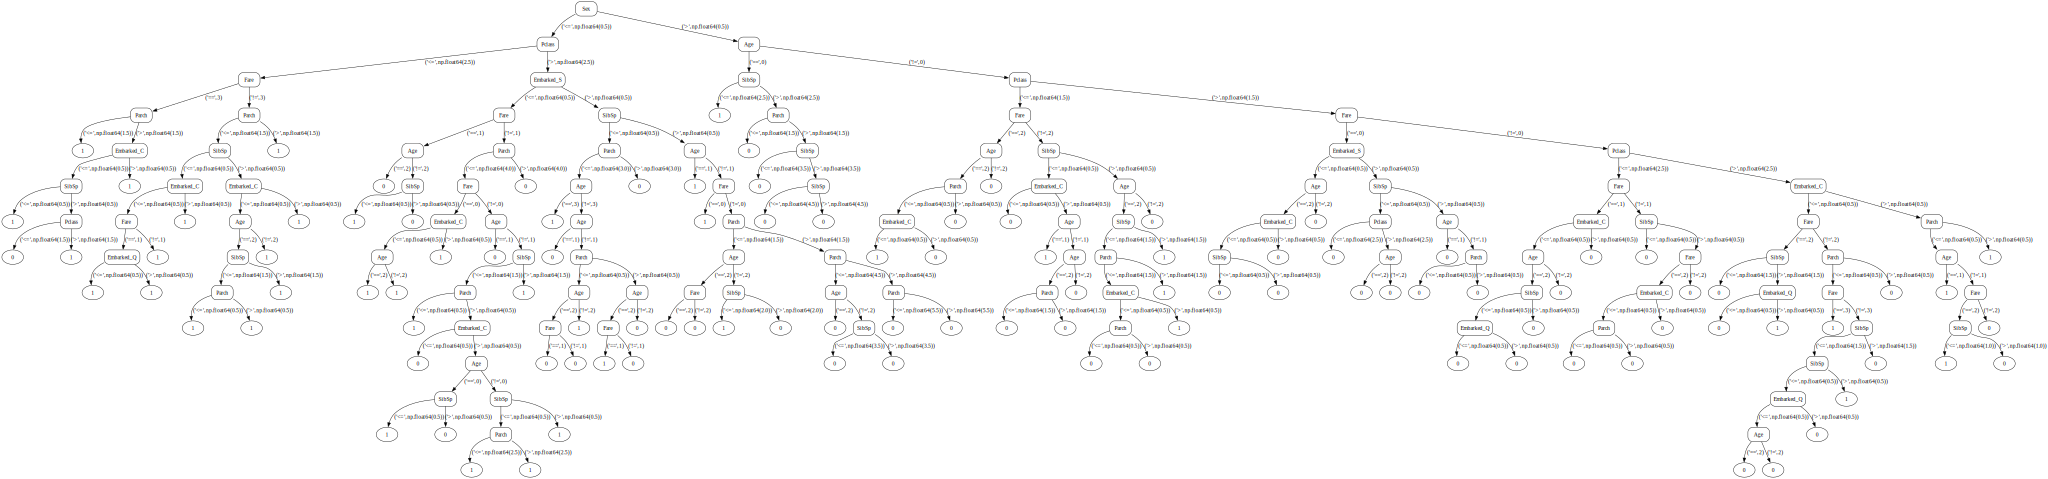

In [36]:
print("--- Algoritmo CART ---")
model_cart = DecisionTreeCART(data=train_data, features=features, target_class=target)
model_cart.build()


test_samples = X_test.to_dict(orient='records')
y_pred = [model_cart.predict(sample) for sample in test_samples]

print("\n--- Métricas de Avaliação para o Modelo Cart  --")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print_formatted_rules(model_cart)
print("\n")

cart_tree_graph = plot_tree(model_cart.tree, features)
cart_tree_graph


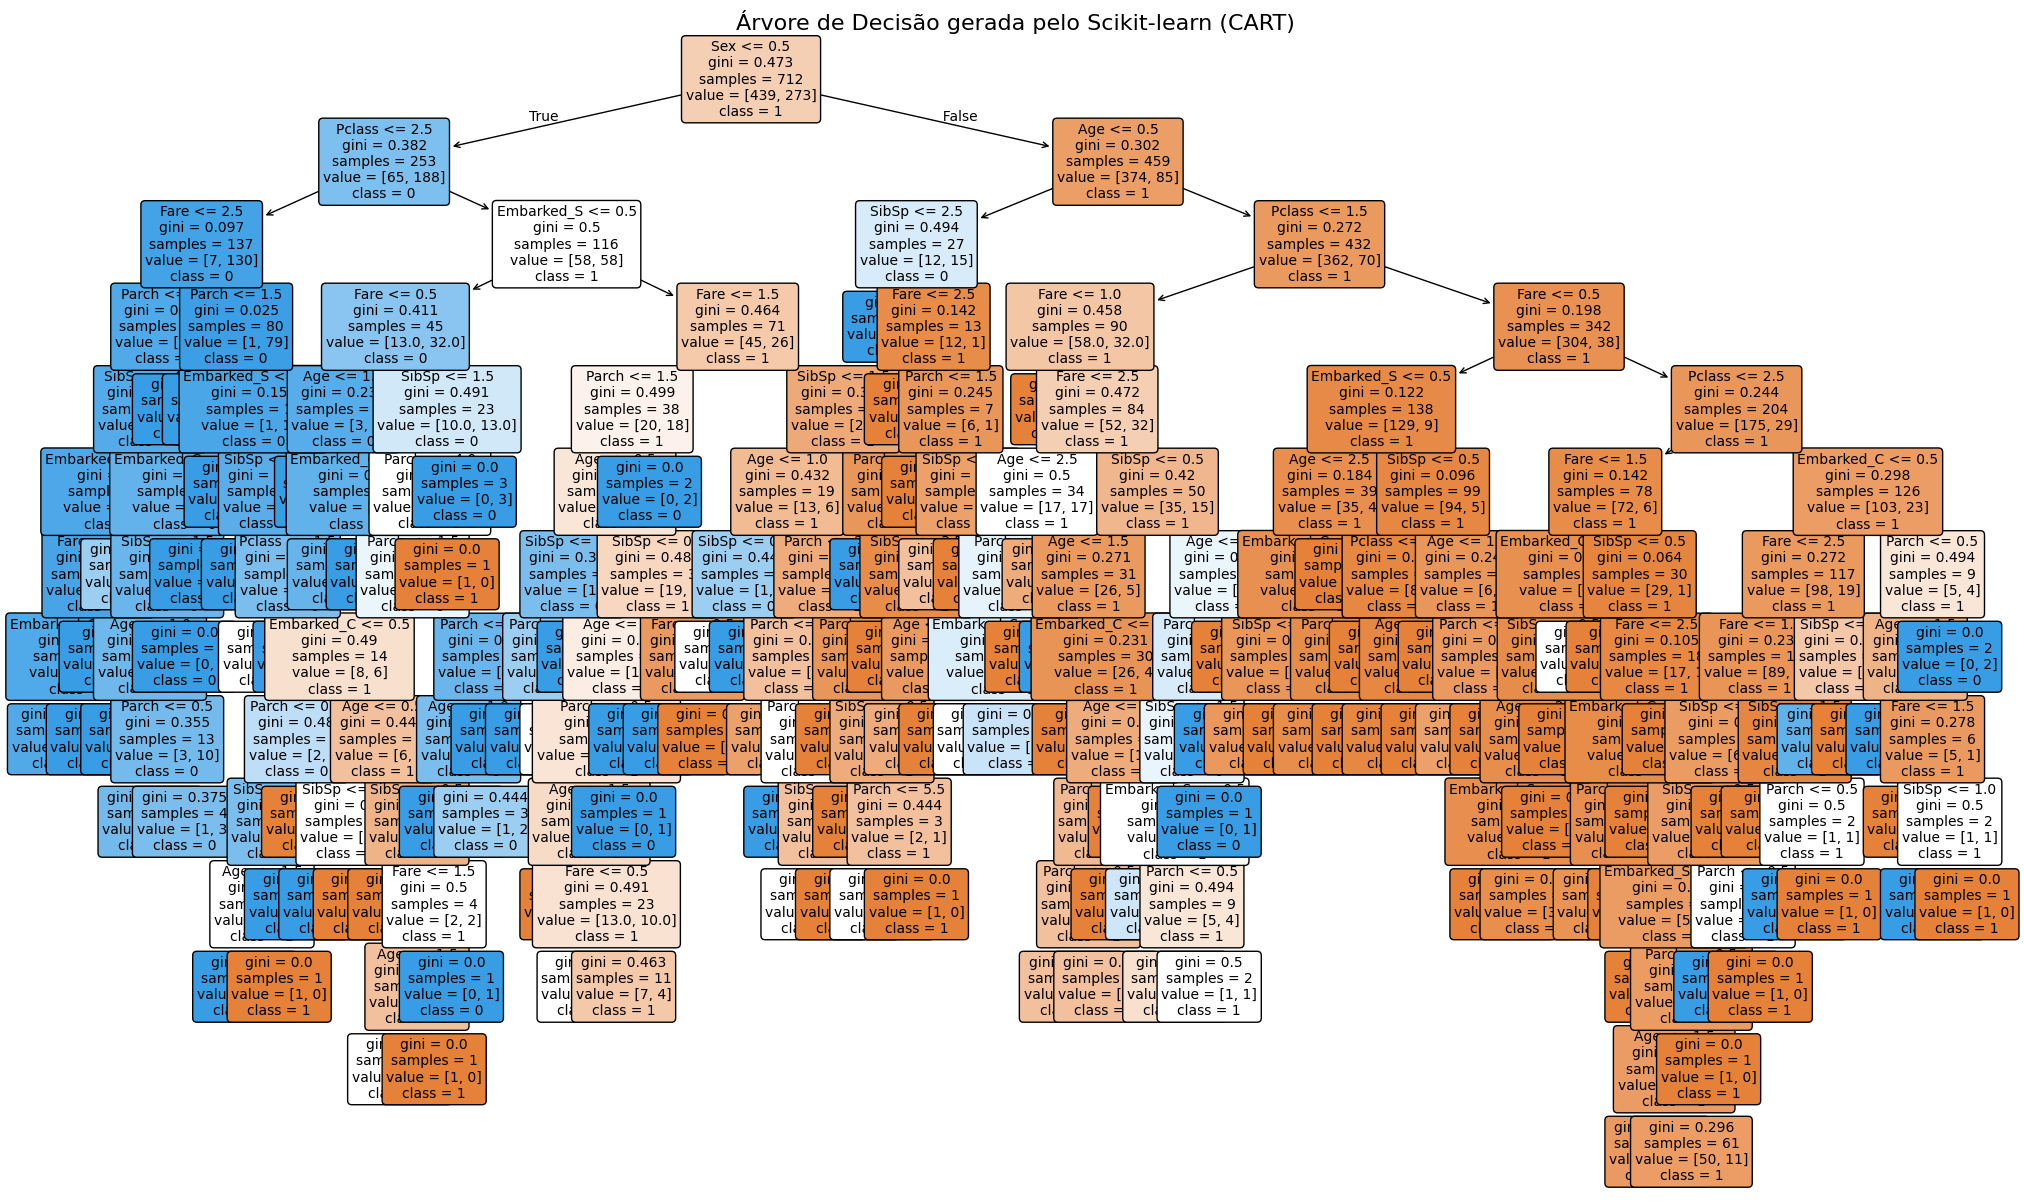

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

sklearn_cart = DecisionTreeClassifier(criterion="gini", random_state=42)
sklearn_cart.fit(X_train, y_train)
plt.figure(figsize=(25, 15))
plot_tree(
    decision_tree=sklearn_cart,
    feature_names=X_train.columns,
    class_names=[str(c) for c in y_train.unique()], # Nomes das classes (ex: '0', '1')
    filled=True,      
    rounded=True,     
    fontsize=10       
)
plt.title("Árvore de Decisão gerada pelo Scikit-learn (CART)", fontsize=16)
plt.show()